In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
43,560,231,222,6,514,451,432,1905,193,995,1239,5,45,1022,7820.0
44,586,237,229,6,532,509,464,1949,197,1022,1344,5,51,1056,8187.0
45,604,239,231,6,542,542,490,2020,198,1051,1399,6,51,1071,8450.0
46,623,240,231,6,561,562,519,2085,201,1076,1426,6,52,1084,8672.0
47,640,243,235,6,593,569,550,2174,211,1118,1515,6,54,1124,9038.0
48,653,248,235,6,619,604,602,2250,214,1155,1604,6,54,1159,9409.0
49,678,253,235,6,637,606,638,2311,214,1176,1684,6,54,1199,9697.0
50,692,258,237,6,653,655,700,2428,220,1187,1730,7,54,1224,10051.0
51,705,259,240,6,672,662,748,2479,225,1231,1785,7,54,1251,10324.0
52,721,269,243,6,681,680,771,2531,228,1265,1804,7,54,1261,10521.0


In [6]:
current_day = df_cases.index[-1]
print("### Time Since Last Doubling ###")
for col in df_cases.columns:
    time_at_half = df_cases[df_cases[col] < (df_cases[col].iloc[-1]/2)].index[-1]
    time_since_doubling = current_day - time_at_half
    
    print(f'{col} : {time_since_doubling} days')

### Time Since Last Doubling ###
Ayrshire and Arran : 19 days
Borders : 26 days
Dumfries and Galloway : 29 days
Eileanan Siar (Western Isles) : 32 days
Fife : 19 days
Forth Valley : 18 days
Grampian : 14 days
Greater Glasgow and Clyde : 20 days
Highland : 23 days
Lanarkshire : 21 days
Lothian : 18 days
Orkney : 29 days
Shetland : 36 days
Tayside : 23 days
Scotland (Total) : 20 days


In [7]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
48,44799,9409,1120
49,46089,9697,1184
50,47749,10051,1231
51,49157,10324,1249
52,50294,10521,1262
53,51499,10721,1332
54,53082,11034,1415
55,54639,11353,1475
56,56702,11654,1515
57,58833,11927,1559


## National Statistics

### total number of cases over time

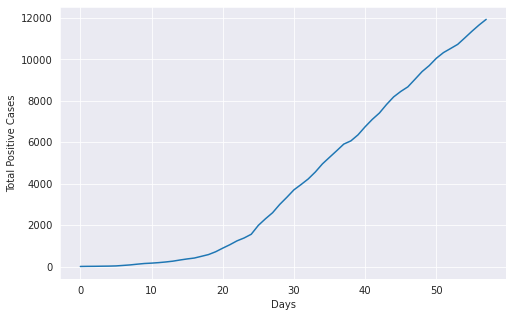

In [8]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

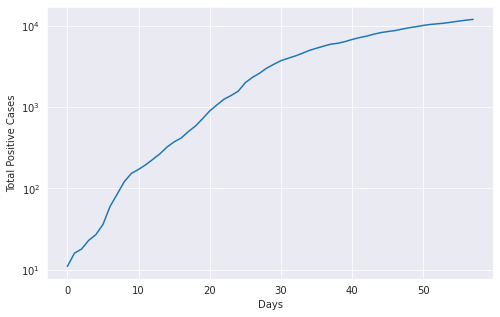

In [9]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

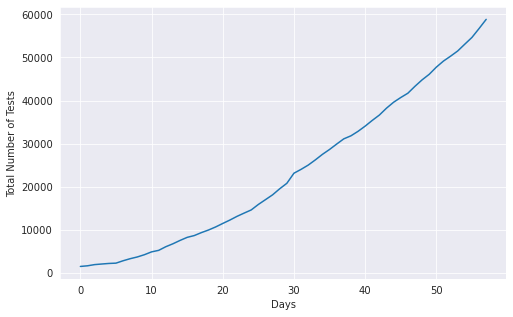

In [10]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [11]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

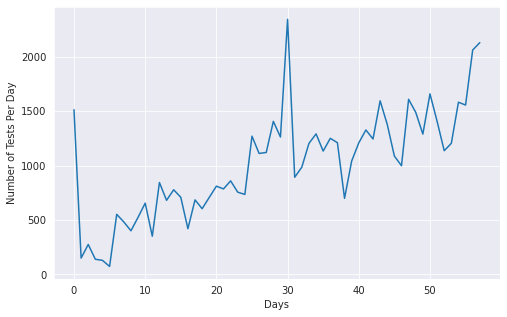

In [12]:
num_test_per_day.plot(figsize=(8, 5))
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

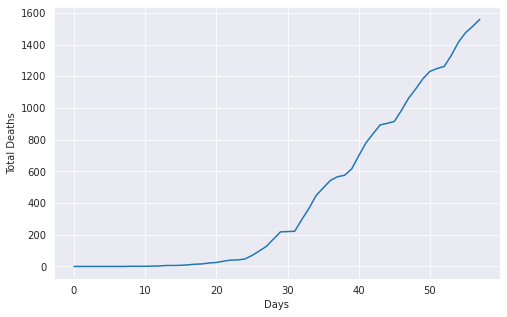

In [13]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

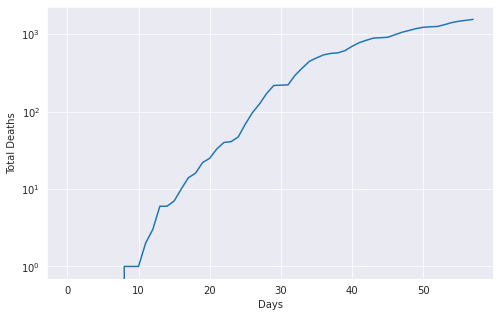

In [14]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

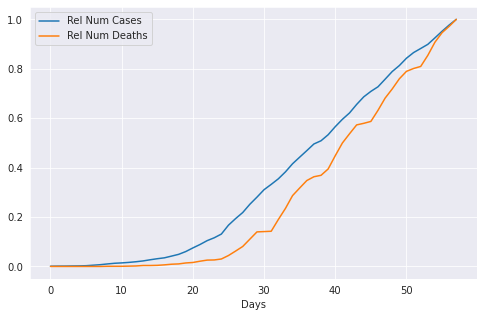

In [15]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

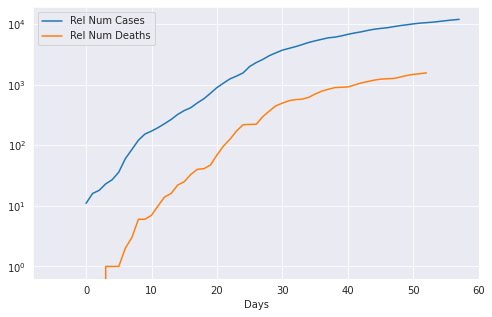

In [16]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day percentage rise in cases?

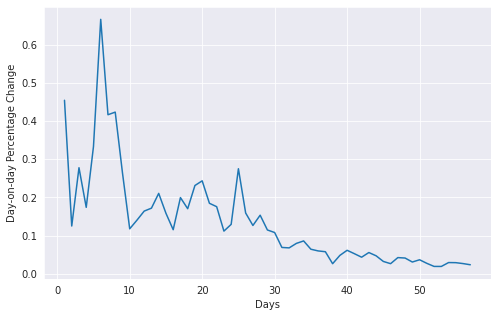

In [17]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

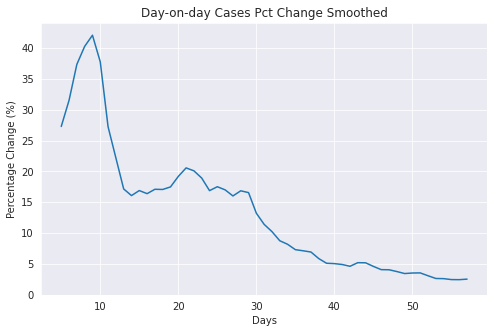

In [18]:
df_total['Total Positive Cases'].pct_change().rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [19]:
df_total['Total Positive Cases'].pct_change()[-7:]

51    0.027161
52    0.019082
53    0.019010
54    0.029195
55    0.028911
56    0.026513
57    0.023425
Name: Total Positive Cases, dtype: float64

In [20]:
df_total['Total Positive Cases'].pct_change().describe()

count    57.000000
mean      0.136754
std       0.128048
min       0.019010
25%       0.043227
50%       0.111647
75%       0.173913
max       0.666667
Name: Total Positive Cases, dtype: float64

In [21]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
48,0.020312,0.020576,0.000000,0.0,0.043845,0.061511,0.094545,0.034959,0.014218,0.033095,0.058746,0.000000,0.0,0.031139,0.041049
49,0.038285,0.020161,0.000000,0.0,0.029079,0.003311,0.059801,0.027111,0.000000,0.018182,0.049875,0.000000,0.0,0.034513,0.030609
50,0.020649,0.019763,0.008511,0.0,0.025118,0.080858,0.097179,0.050627,0.028037,0.009354,0.027316,0.166667,0.0,0.020851,0.036506
51,0.018786,0.003876,0.012658,0.0,0.029096,0.010687,0.068571,0.021005,0.022727,0.037068,0.031792,0.000000,0.0,0.022059,0.027161
52,0.022695,0.038610,0.012500,0.0,0.013393,0.027190,0.030749,0.020976,0.013333,0.027620,0.010644,0.000000,0.0,0.007994,0.019082
53,0.023578,0.011152,0.000000,0.0,0.016153,0.013235,0.014267,0.028842,0.017544,0.025296,0.015521,0.000000,0.0,0.009516,0.019010
54,0.009485,0.025735,0.004115,0.0,0.028902,0.040639,0.039642,0.026114,0.017241,0.024672,0.040939,0.000000,0.0,0.031422,0.029195
55,0.022819,0.000000,0.008197,0.0,0.035112,0.009763,0.025830,0.032560,0.025424,0.033860,0.038280,0.000000,0.0,0.027418,0.028911
56,0.020997,0.007168,0.012195,0.0,0.017639,0.031768,0.038369,0.038057,0.070248,0.018923,0.017172,0.000000,0.0,0.022239,0.026513
57,0.019280,0.007117,0.004016,0.0,0.024000,0.013387,0.026559,0.026187,0.111969,0.025714,0.025323,0.000000,0.0,0.009427,0.023425


In [22]:
df_cases.pct_change().rolling(5).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
48,0.031240,0.014335,0.011516,0.0,0.037952,0.060861,0.068714,0.033870,0.020984,0.030285,0.053225,0.040000,0.038281,0.025530,0.037716
49,0.029612,0.013172,0.005210,0.0,0.036763,0.035802,0.065859,0.034673,0.016839,0.028495,0.046251,0.040000,0.011614,0.025779,0.034452
50,0.027598,0.015437,0.005165,0.0,0.038028,0.039007,0.074088,0.037512,0.021432,0.024690,0.043530,0.033333,0.011614,0.027108,0.035328
51,0.025064,0.015375,0.007697,0.0,0.036836,0.033765,0.075965,0.035278,0.022947,0.027346,0.046028,0.033333,0.007692,0.029092,0.035506
52,0.024145,0.020597,0.006734,0.0,0.028106,0.036712,0.070169,0.030936,0.015663,0.025064,0.035675,0.033333,0.000000,0.023311,0.030881
53,0.024799,0.018713,0.006734,0.0,0.022568,0.027056,0.054113,0.029712,0.016328,0.023504,0.027030,0.033333,0.000000,0.018986,0.026474
54,0.019039,0.019827,0.007557,0.0,0.022532,0.034522,0.050082,0.029513,0.019777,0.024802,0.025242,0.033333,0.000000,0.018368,0.026191
55,0.019473,0.015875,0.007494,0.0,0.024531,0.020303,0.035812,0.025899,0.019254,0.029703,0.027435,0.000000,0.000000,0.019682,0.024672
56,0.019915,0.016533,0.007401,0.0,0.022240,0.024519,0.029771,0.029310,0.028758,0.026074,0.024511,0.000000,0.000000,0.019718,0.024542
57,0.019232,0.010235,0.005705,0.0,0.024361,0.021758,0.028934,0.030352,0.048485,0.025693,0.027447,0.000000,0.000000,0.020004,0.025411


### What is the day-on-day percentage rise in deaths?

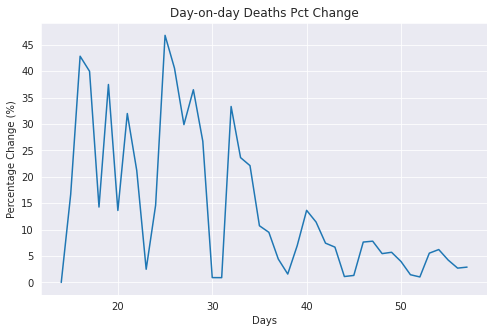

In [23]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

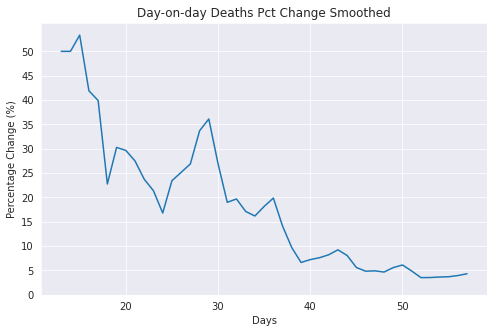

In [24]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [25]:
death_pct_change[-10:]

48    0.054614
49    0.057143
50    0.039696
51    0.014622
52    0.010408
53    0.055468
54    0.062312
55    0.042403
56    0.027119
57    0.029043
Name: Total Deaths, dtype: float64

In [26]:
death_pct_change.describe()

count    50.000000
mean           inf
std            NaN
min       0.000000
25%       0.031706
50%       0.086561
75%       0.291087
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

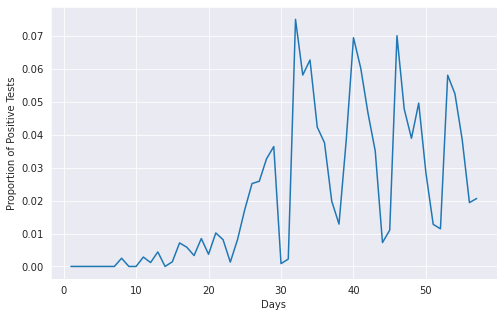

In [27]:
prop_pos = (df_total['Total Deaths'].diff() / df_total['Total Tests'].diff()).dropna()

prop_pos.plot(figsize=(8, 5))
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

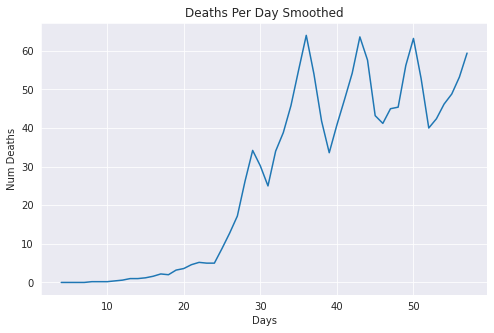

In [28]:
# remove first 13 points because they have nothing
death_per_day = df_total['Total Deaths'].diff().fillna(0)
death_per_day.rolling(5).mean().plot(figsize=(8, 5))
plt.title('Deaths Per Day Smoothed')
plt.ylabel('Num Deaths')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

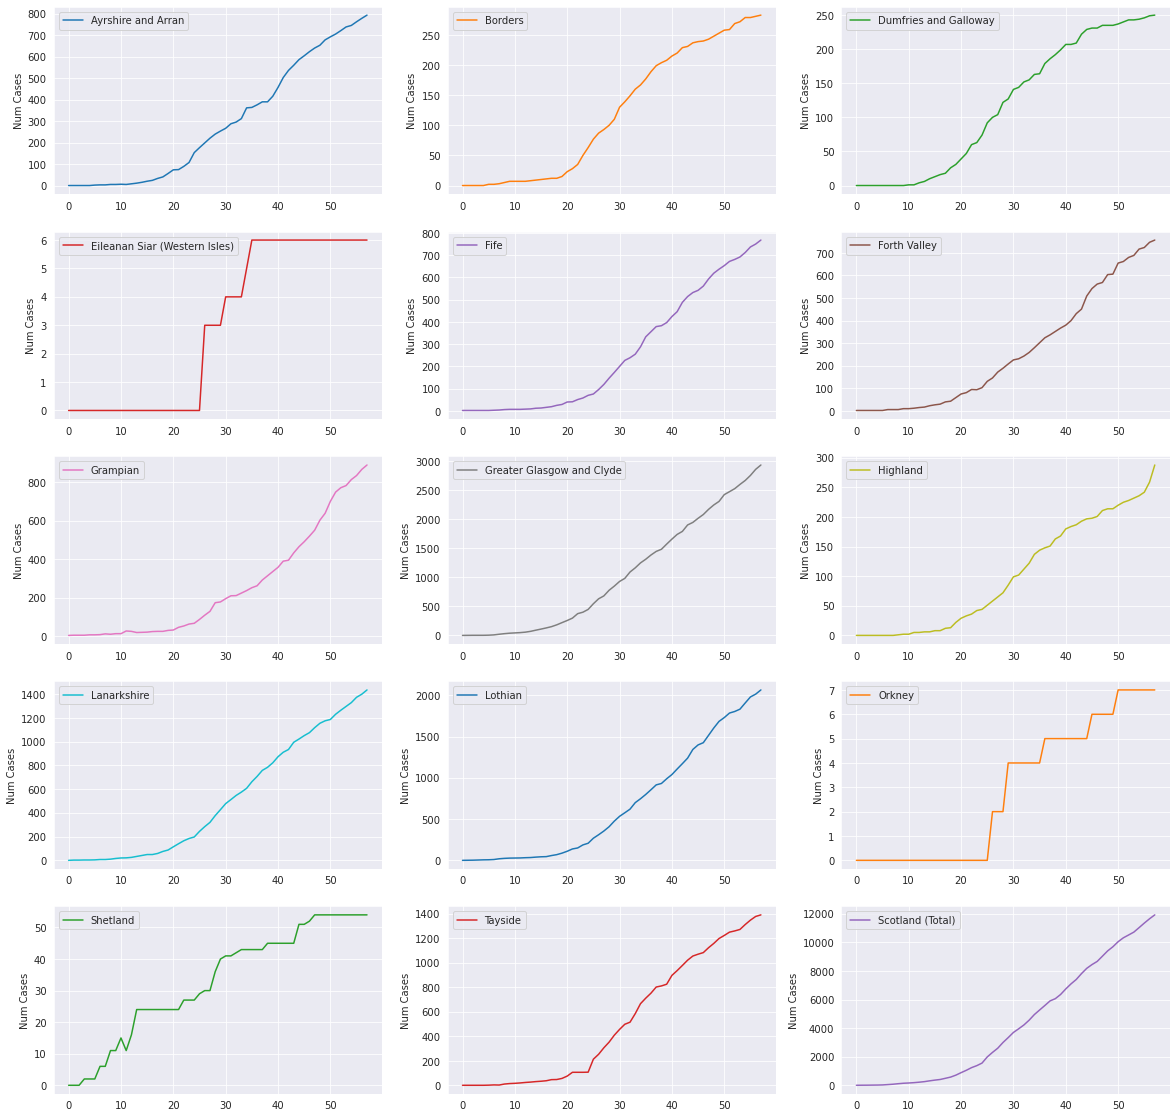

In [29]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

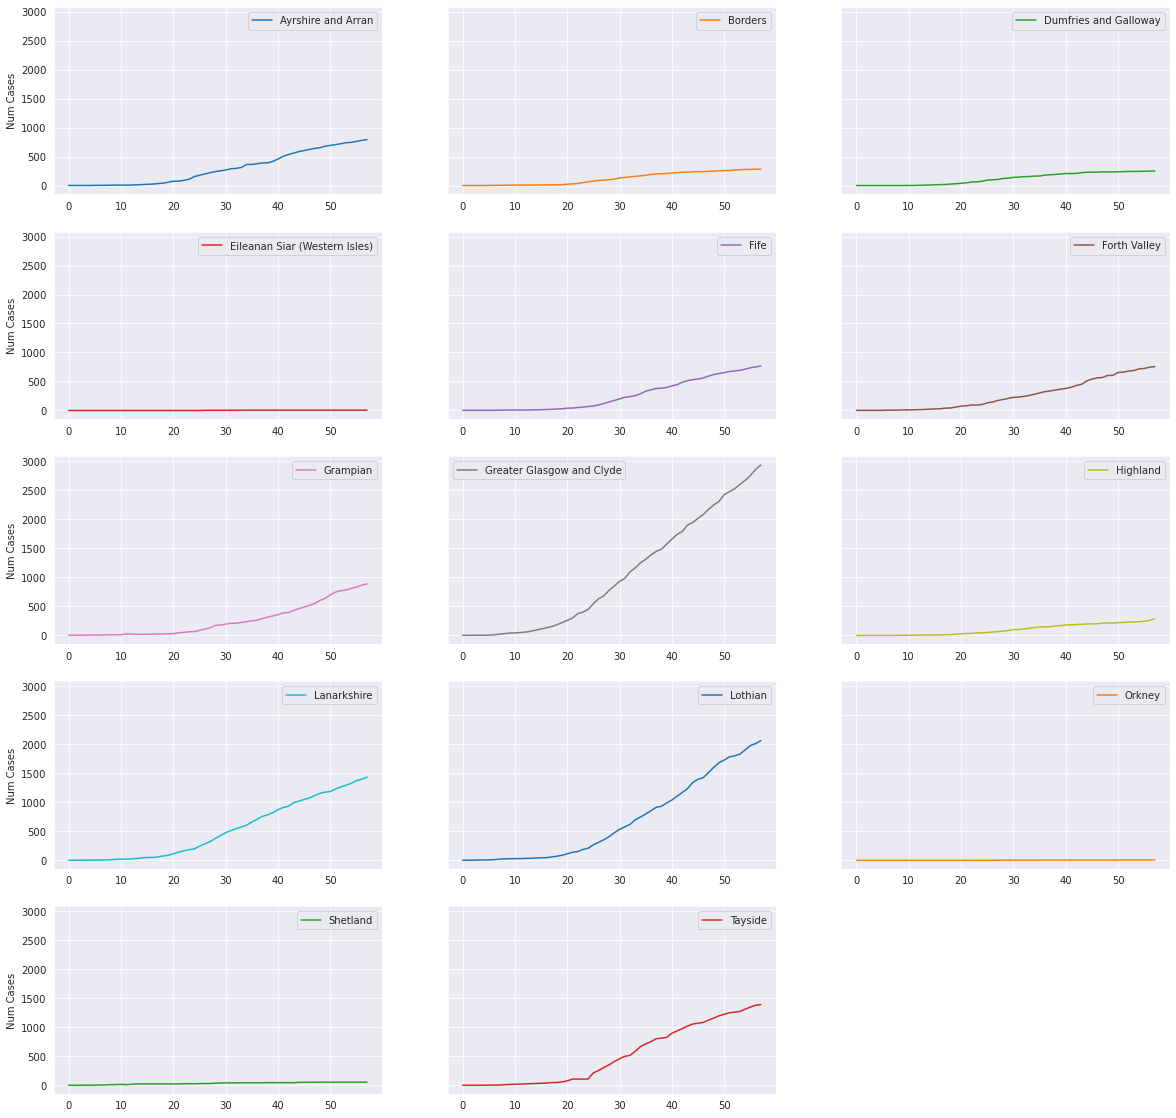

In [30]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [31]:
194 / 178

1.0898876404494382

In [32]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [33]:
df_cases_rel = df_cases / df_pop.values.T * 100000

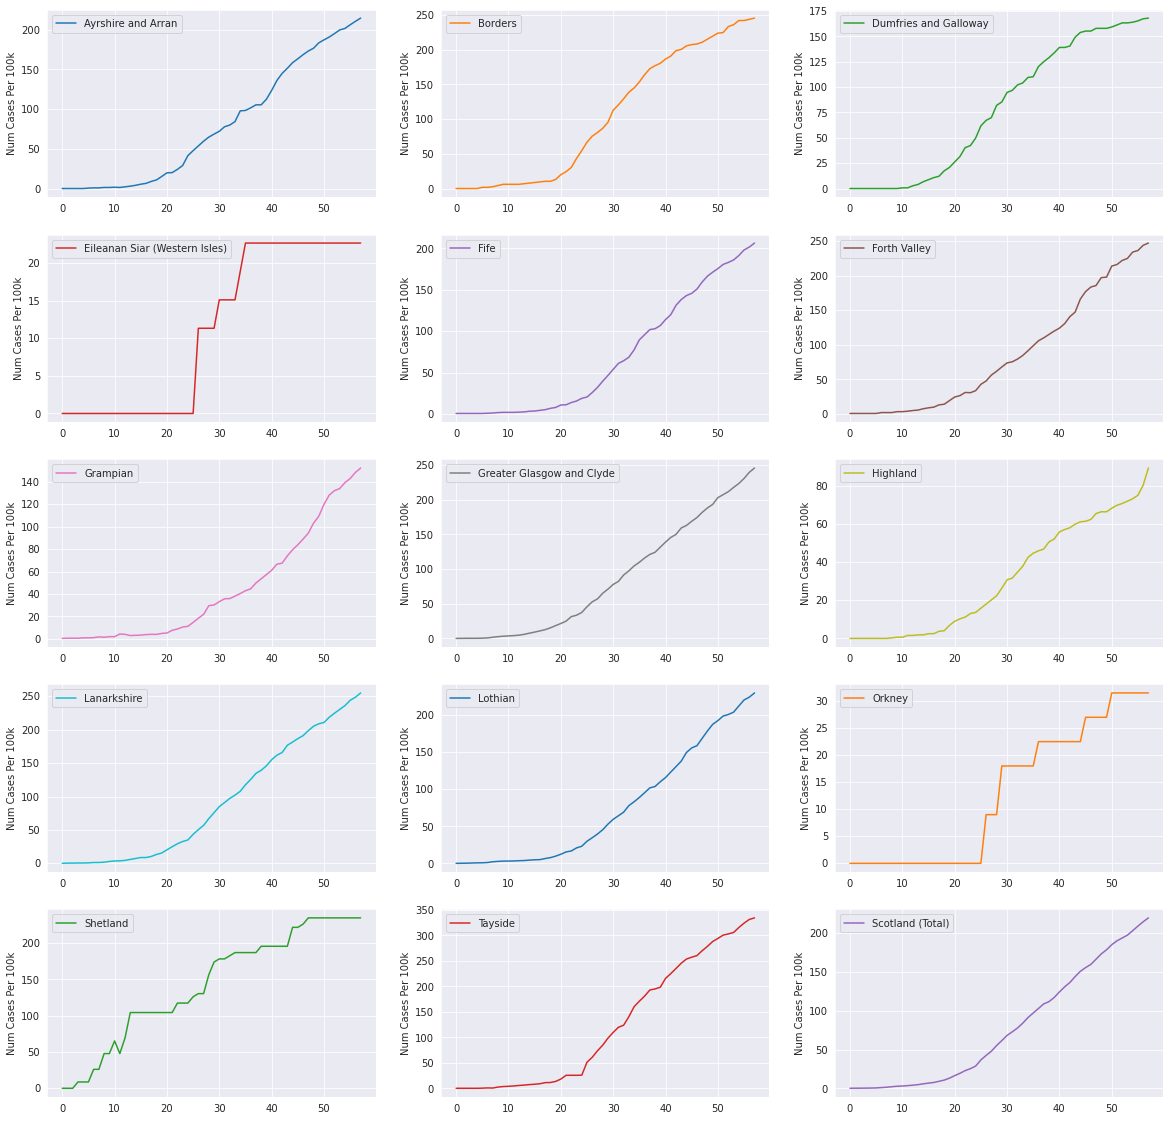

In [34]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

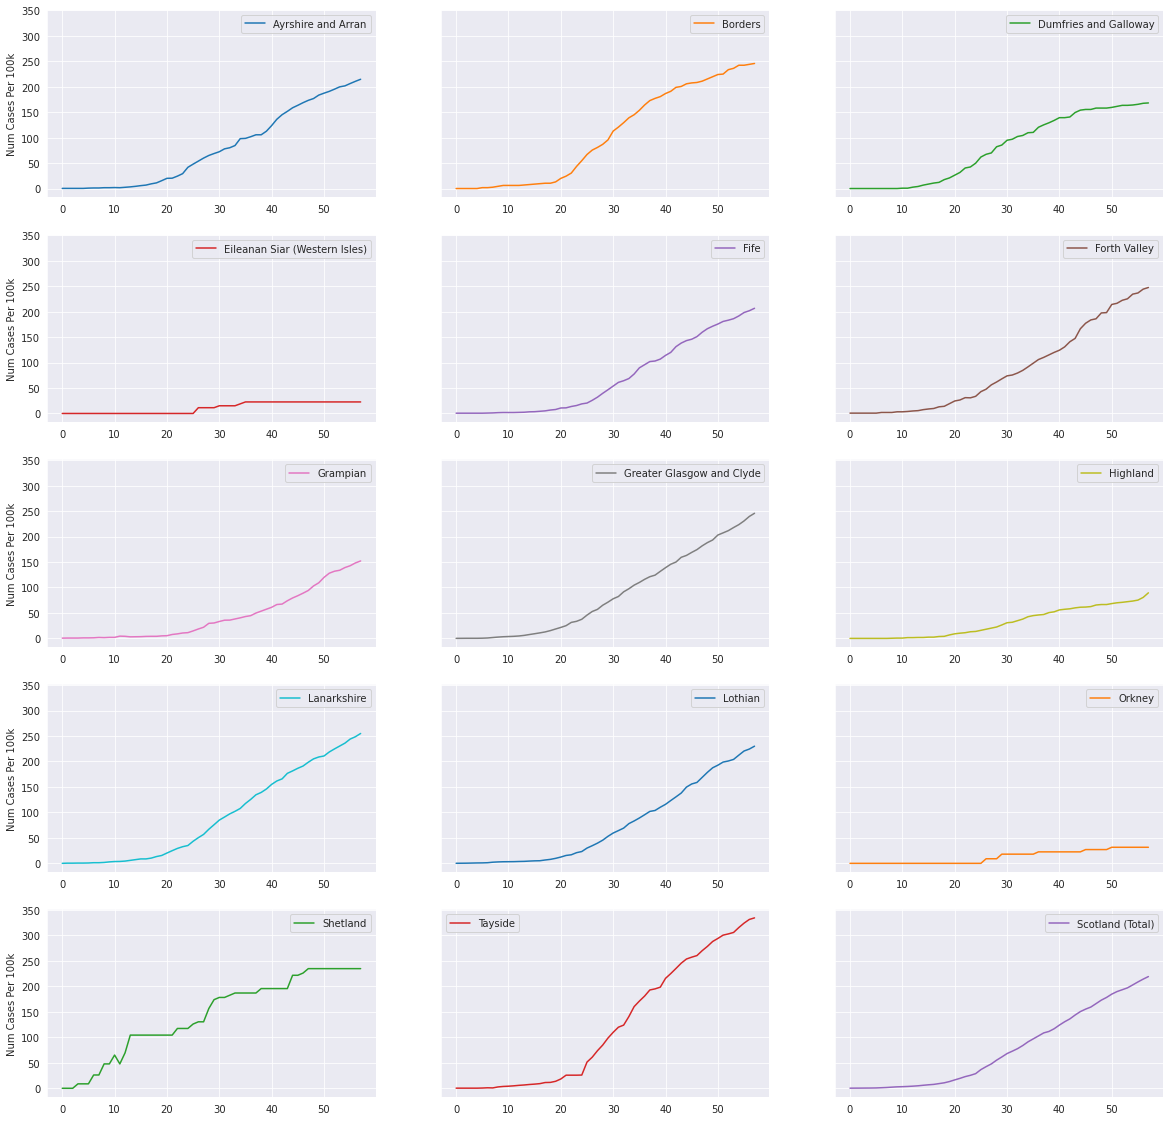

In [35]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

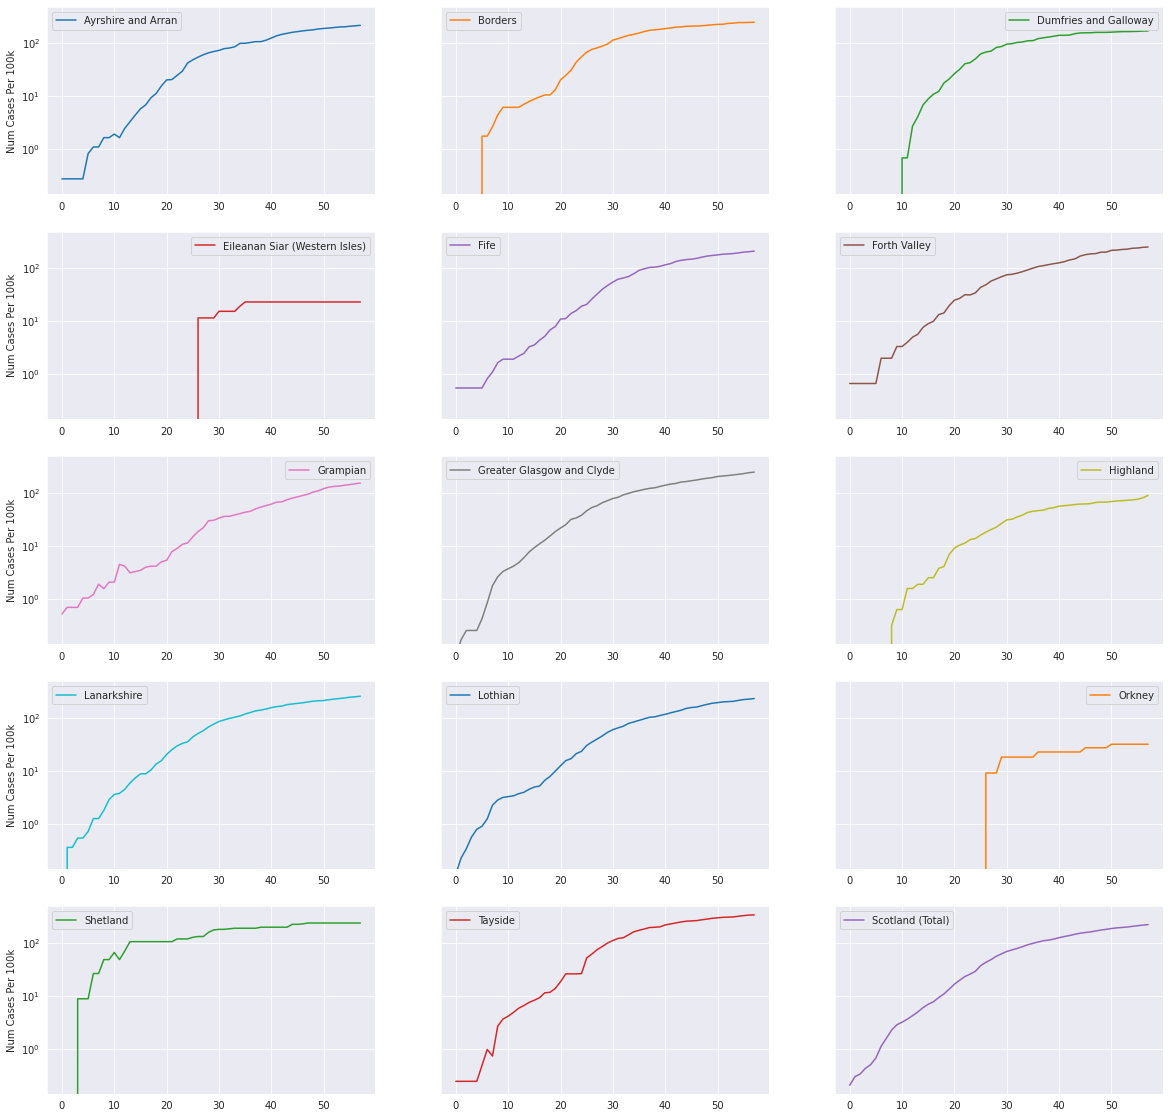

In [36]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

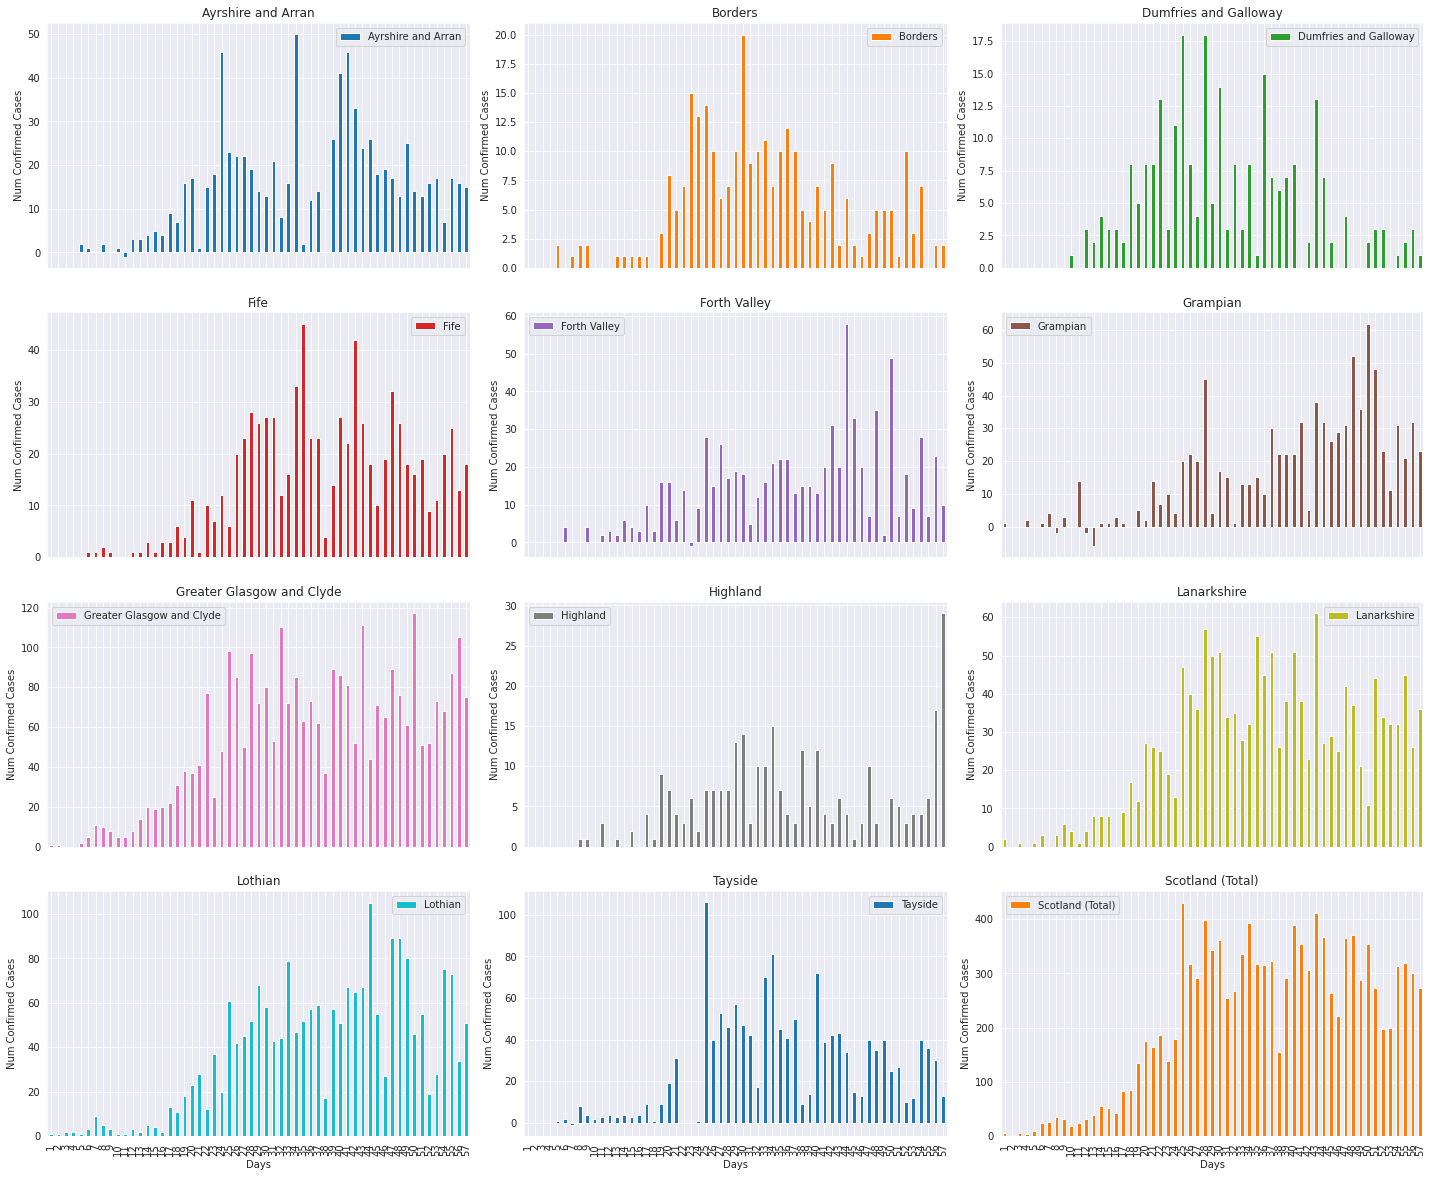

In [37]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

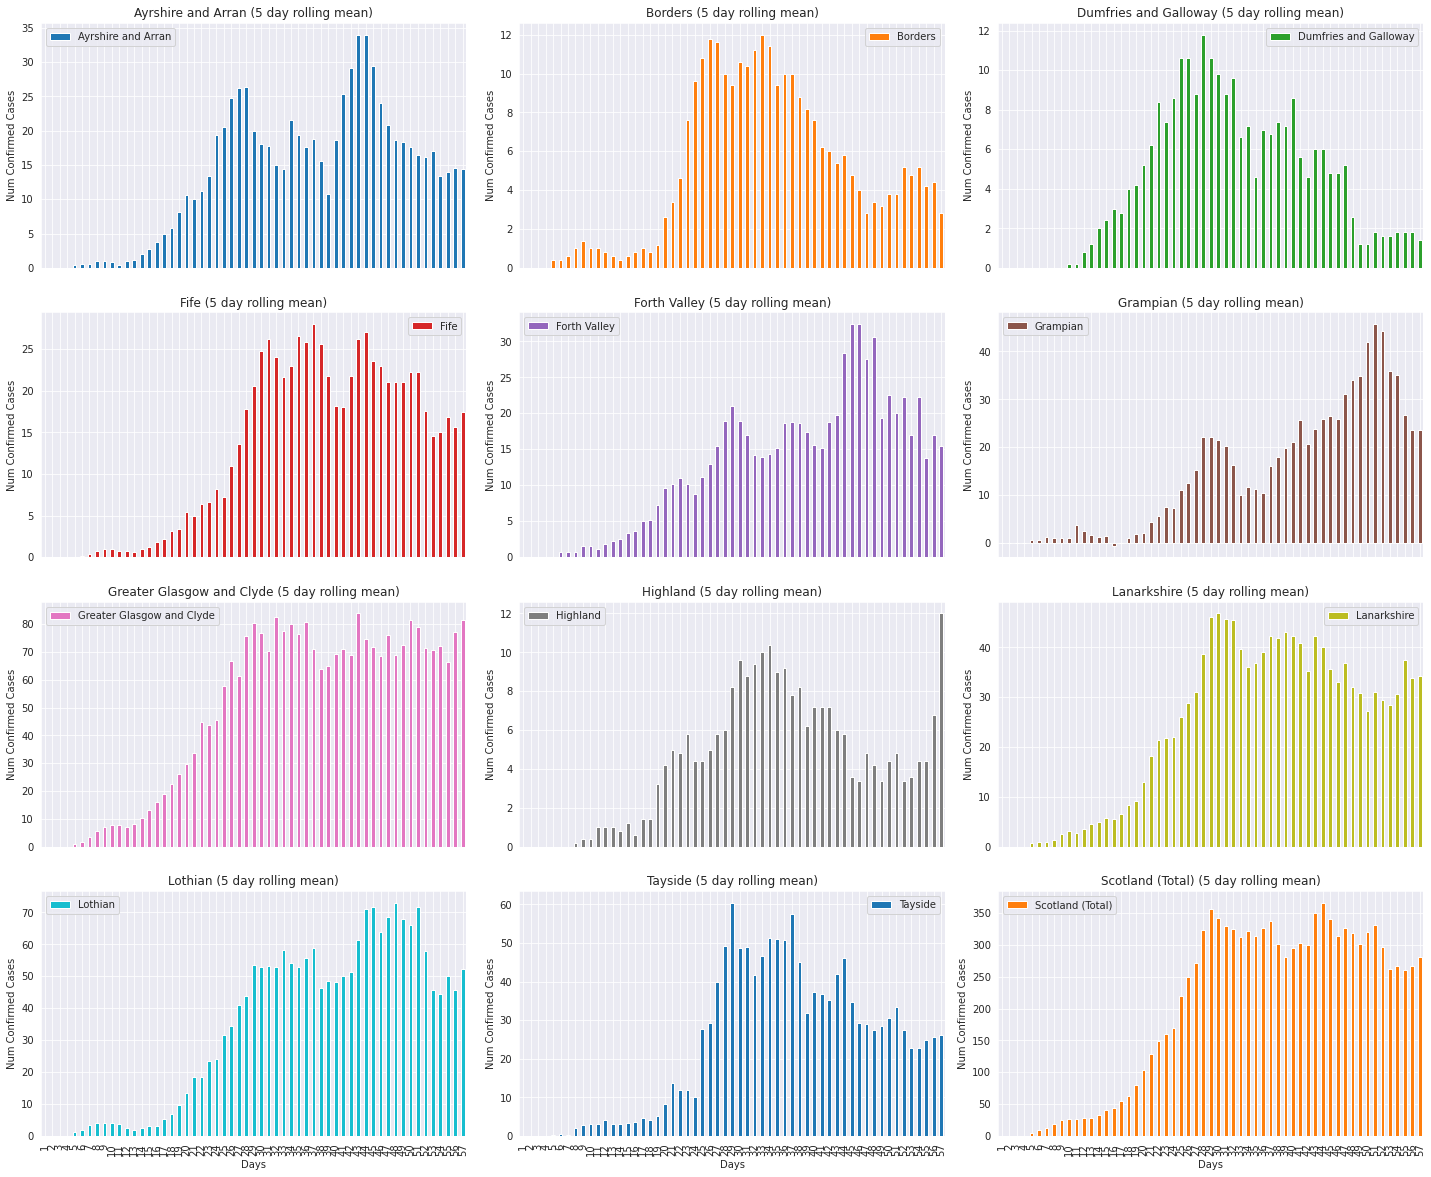

In [38]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(5).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + ' (5 day rolling mean)')
plt.tight_layout()
plt.show()

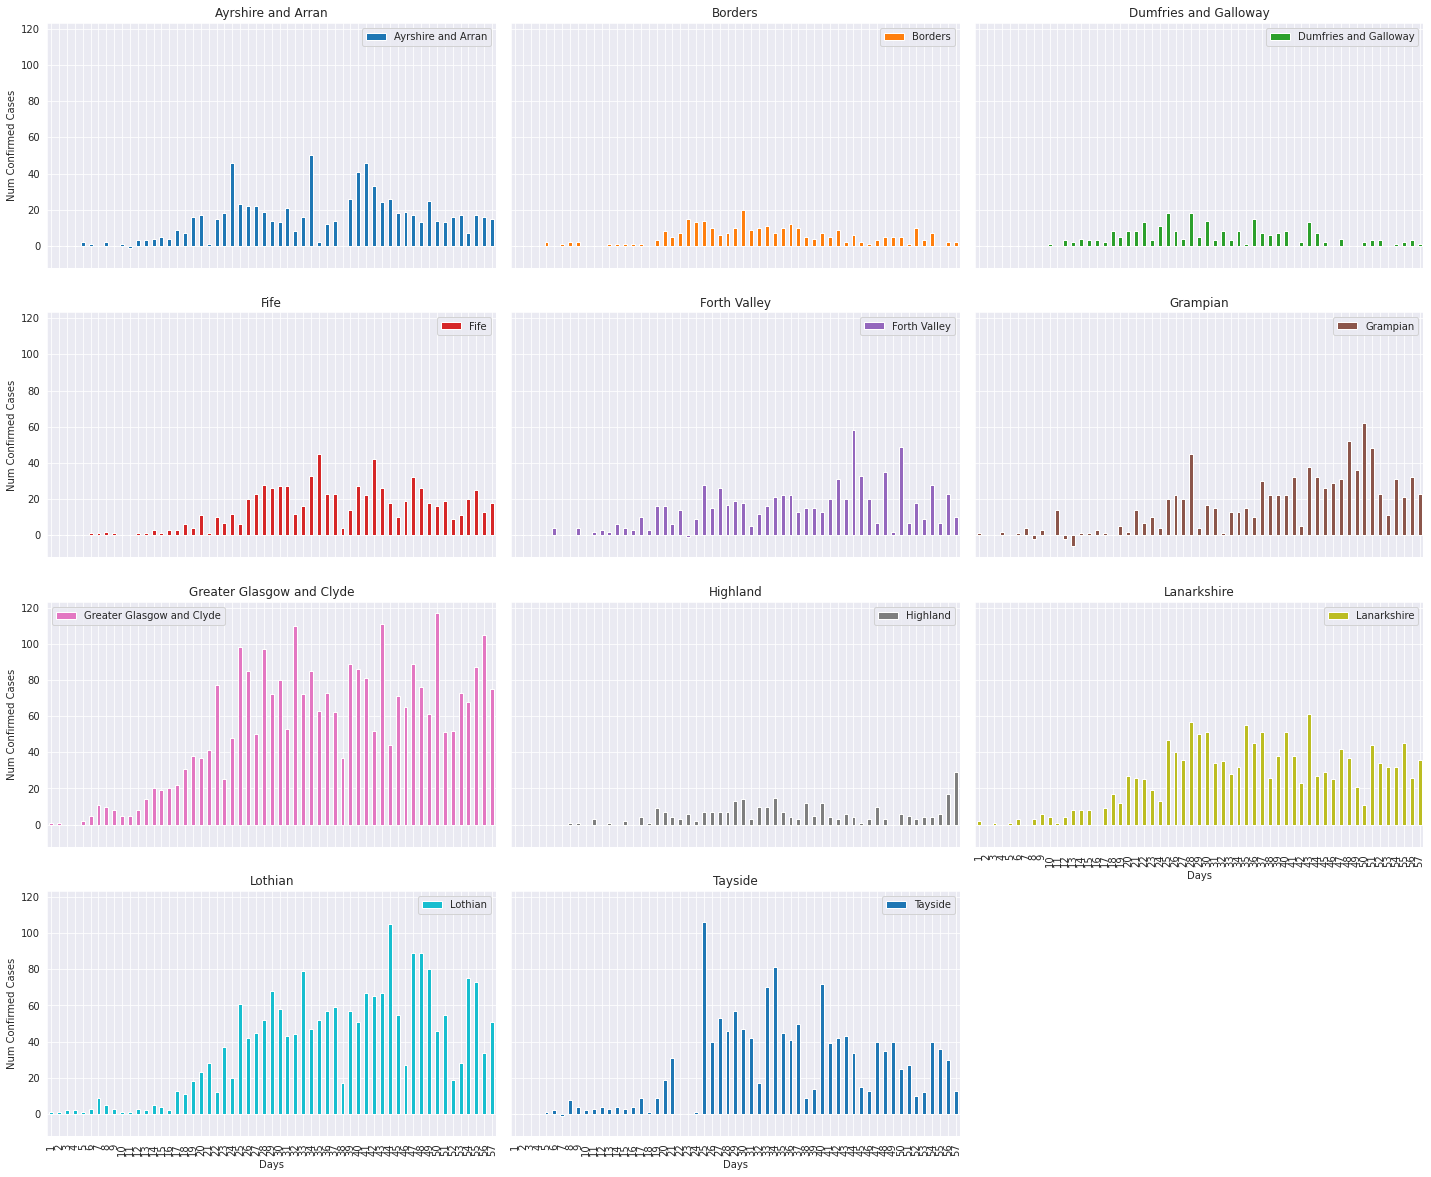

In [39]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [40]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

### Log Growth Curves for Each Region

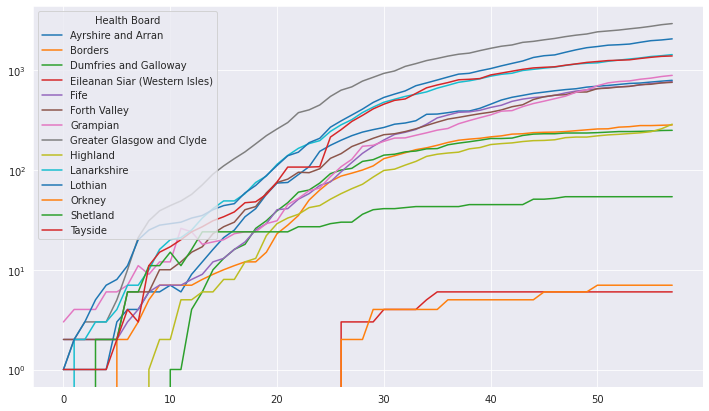

In [43]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

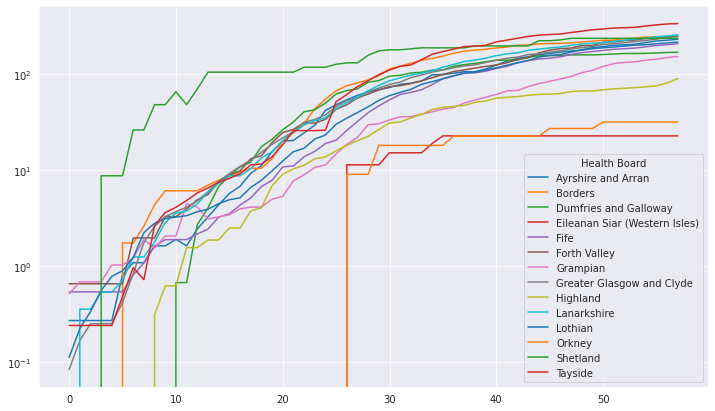

In [44]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()